In [356]:
import numpy as np
import pandas as pd

In [357]:
df=pd.read_csv('./dataset.csv')
df

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris


In [358]:
dff=df

In [359]:
df.isnull().sum()

CustomerID            0
PurchaseDate          0
TransactionAmount     0
ProductInformation    0
OrderID               0
Location              0
dtype: int64

In [360]:
df['PurchaseDate']

0      2023-04-11
1      2023-04-11
2      2023-04-11
3      2023-04-11
4      2023-04-11
          ...    
995    2023-06-10
996    2023-06-10
997    2023-06-10
998    2023-06-10
999    2023-06-10
Name: PurchaseDate, Length: 1000, dtype: object

In [361]:
df['PurchaseDate'].count()

np.int64(1000)

In [362]:
df['PurchaseDate'].value_counts()

PurchaseDate
2023-05-04    27
2023-05-29    24
2023-04-21    23
2023-04-27    23
2023-04-13    23
              ..
2023-05-18     9
2023-06-08     9
2023-04-20     8
2023-04-11     8
2023-05-12     7
Name: count, Length: 61, dtype: int64

In [363]:
# display(df.query('PurchaseDate'=='2023-05-08'))
display(df[df['PurchaseDate'] == '2023-05-08'])

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
482,1011,2023-05-08,210.30,Product B,781571,Paris
483,8616,2023-05-08,827.48,Product C,437960,London
484,5471,2023-05-08,490.79,Product D,452457,Tokyo
485,7286,2023-05-08,193.90,Product B,681868,London
486,3114,2023-05-08,507.84,Product A,971776,New York
487,5673,2023-05-08,699.63,Product D,262316,London
488,2761,2023-05-08,142.60,Product C,862847,Paris
489,2443,2023-05-08,846.04,Product B,556839,Tokyo
490,6967,2023-05-08,79.27,Product C,753425,Paris
491,3502,2023-05-08,970.83,Product C,570988,London


In [364]:
filtered_values = np.where([df['PurchaseDate'] == '2023-05-08'])
filtered_values

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493]))

In [365]:
df[df['CustomerID'] ==1011]

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
371,1011,2023-05-02,918.72,Product B,945619,London
482,1011,2023-05-08,210.30,Product B,781571,Paris


In [366]:
df['PurchaseDate']=pd.to_datetime(df.PurchaseDate)

In [367]:
df['PurchaseDate']

0     2023-04-11
1     2023-04-11
2     2023-04-11
3     2023-04-11
4     2023-04-11
         ...    
995   2023-06-10
996   2023-06-10
997   2023-06-10
998   2023-06-10
999   2023-06-10
Name: PurchaseDate, Length: 1000, dtype: datetime64[ns]

In [368]:
time1=df.groupby('CustomerID',as_index=False)['PurchaseDate'].max()
time1

,CustomerID,PurchaseDate
0,1011,2023-05-08
1,1025,2023-05-20
2,1029,2023-06-10
3,1046,2023-04-28
4,1049,2023-05-28
...,...,...
941,9941,2023-04-29
942,9950,2023-05-03
943,9954,2023-05-29
944,9985,2023-04-14


In [369]:
time1.columns=['customerID','Latest Purchase Date']

In [370]:
time1

,customerID,Latest Purchase Date
0,1011,2023-05-08
1,1025,2023-05-20
2,1029,2023-06-10
3,1046,2023-04-28
4,1049,2023-05-28
...,...,...
941,9941,2023-04-29
942,9950,2023-05-03
943,9954,2023-05-29
944,9985,2023-04-14


In [371]:
time2=time1['Latest Purchase Date'].max()
time2

Timestamp('2023-06-10 00:00:00')

In [372]:
time1['recency']=time1['Latest Purchase Date'].map(lambda x:time2-x)

time1

,customerID,Latest Purchase Date,recency
0,1011,2023-05-08,33 days
1,1025,2023-05-20,21 days
2,1029,2023-06-10,0 days
3,1046,2023-04-28,43 days
4,1049,2023-05-28,13 days
...,...,...,...
941,9941,2023-04-29,42 days
942,9950,2023-05-03,38 days
943,9954,2023-05-29,12 days
944,9985,2023-04-14,57 days


In [373]:
time1['recency']=time1['recency'].dt.days
time1

,customerID,Latest Purchase Date,recency
0,1011,2023-05-08,33
1,1025,2023-05-20,21
2,1029,2023-06-10,0
3,1046,2023-04-28,43
4,1049,2023-05-28,13
...,...,...,...
941,9941,2023-04-29,42
942,9950,2023-05-03,38
943,9954,2023-05-29,12
944,9985,2023-04-14,57


In [374]:
dfresency=time1
dfresency

,customerID,Latest Purchase Date,recency
0,1011,2023-05-08,33
1,1025,2023-05-20,21
2,1029,2023-06-10,0
3,1046,2023-04-28,43
4,1049,2023-05-28,13
...,...,...,...
941,9941,2023-04-29,42
942,9950,2023-05-03,38
943,9954,2023-05-29,12
944,9985,2023-04-14,57


2)Frequency...

Akoi dine akadhikbar segulo bad dear jonno drop dupllicate...

In [375]:
dff=df.copy()

In [376]:
dff

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris


In [377]:
dff['CustomerID'].value_counts(ascending=True)

CustomerID
4982    1
2188    1
4608    1
2559    1
9482    1
       ..
7511    2
7046    2
5557    3
4804    3
7363    3
Name: count, Length: 946, dtype: int64

In [378]:
dffrequency=dff.drop_duplicates().groupby('CustomerID',as_index=False)['PurchaseDate'].count()
dffrequency.columns=['customerID','Frequency']

In [379]:
dffrequency['customerID'].value_counts(ascending=False)

customerID
9991    1
1011    1
1025    1
1029    1
1046    1
       ..
1225    1
1228    1
1230    1
1256    1
1265    1
Name: count, Length: 946, dtype: int64

In [380]:
dffrequency

,customerID,Frequency
0,1011,2
1,1025,1
2,1029,1
3,1046,1
4,1049,1
...,...,...
941,9941,1
942,9950,1
943,9954,1
944,9985,1


3.Monetary...

In [381]:
dfmonetary=dff.groupby('CustomerID',as_index=False)['TransactionAmount'].sum()
dfmonetary.columns=['customerID','Monetary']

In [382]:
dfmonetary

,customerID,Monetary
0,1011,1129.02
1,1025,359.29
2,1029,704.99
3,1046,859.82
4,1049,225.72
...,...,...
941,9941,960.53
942,9950,679.11
943,9954,798.01
944,9985,36.10


Merge Columns...

In [383]:
df = pd.merge(pd.merge(dfresency, dffrequency, on=['customerID'], how='outer'), dfmonetary, on=['customerID'], how='outer')

print(df)

     customerID Latest Purchase Date  recency  Frequency  Monetary
0          1011           2023-05-08       33          2   1129.02
1          1025           2023-05-20       21          1    359.29
2          1029           2023-06-10        0          1    704.99
3          1046           2023-04-28       43          1    859.82
4          1049           2023-05-28       13          1    225.72
..          ...                  ...      ...        ...       ...
941        9941           2023-04-29       42          1    960.53
942        9950           2023-05-03       38          1    679.11
943        9954           2023-05-29       12          1    798.01
944        9985           2023-04-14       57          1     36.10
945        9991           2023-05-11       30          1    626.81

[946 rows x 5 columns]


In [384]:
df['R_rank'] = df['recency'].rank(ascending=False)
df['F_rank'] = df['Frequency'].rank(ascending=True)
df['M_rank'] = df['Monetary'].rank(ascending=True)

In [385]:
df['R_rank_norm'] = (df['R_rank'] / df['R_rank'].max()) * 100
df['F_rank_norm'] = (df['F_rank'] / df['F_rank'].max()) * 100
df['M_rank_norm'] = (df['M_rank'] / df['M_rank'].max()) * 100

In [386]:
df

,customerID,Latest Purchase Date,recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm
0,1011,2023-05-08,33,2,1129.02,443.5,919.5,926.0,47.331910,97.301587,97.885835
1,1025,2023-05-20,21,1,359.29,606.5,448.0,304.0,64.727855,47.407407,32.135307
2,1029,2023-06-10,0,1,704.99,937.0,448.0,632.0,100.000000,47.407407,66.807611
3,1046,2023-04-28,43,1,859.82,261.5,448.0,788.0,27.908218,47.407407,83.298097
4,1049,2023-05-28,13,1,225.72,738.0,448.0,201.0,78.762006,47.407407,21.247357
...,...,...,...,...,...,...,...,...,...,...,...
941,9941,2023-04-29,42,1,960.53,278.5,448.0,877.0,29.722519,47.407407,92.706131
942,9950,2023-05-03,38,1,679.11,354.0,448.0,599.0,37.780149,47.407407,63.319239
943,9954,2023-05-29,12,1,798.01,759.5,448.0,727.0,81.056564,47.407407,76.849894
944,9985,2023-04-14,57,1,36.10,51.5,448.0,18.0,5.496265,47.407407,1.902748


In [387]:
df['RFM_Score'] = 0.15 * df['R_rank_norm'] + 0.28 *df['F_rank_norm'] + 0.57 * df['M_rank_norm']
df['RFM_Score'] *= 0.05
df = df.round(2)

In [388]:
df[['customerID', 'RFM_Score']].head(7)

,customerID,RFM_Score
0,1011,4.51
1,1025,2.07
2,1029,3.32
3,1046,3.25
4,1049,1.86
5,1082,2.69
6,1086,1.53


In [389]:
df.groupby('customerID')['RFM_Score'].max().sort_values(ascending=False)

customerID
1480    4.91
5557    4.90
1305    4.88
1803    4.86
2133    4.84
        ... 
8017    0.80
4271    0.79
9985    0.76
5533    0.70
8993    0.70
Name: RFM_Score, Length: 946, dtype: float64

In [390]:
def cost_category(value):
    if value > 4.5:
        return "Top Customers"
    elif 4 < value <= 4.5:
        return "High value customer"
    elif 3<value<=4:
        return "Medium Value Customer"
    elif 1.6<value<=3:
        return "Low Value Customer"
    else:
        return "Low Customers"

# Create a new column using map()
df["Customer_segment"] = df['RFM_Score'].map(cost_category)

In [391]:
df.head(20)

,customerID,Latest Purchase Date,recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,1011,2023-05-08,33,2,1129.02,443.5,919.5,926.0,47.33,97.30,97.89,4.51,Top Customers
1,1025,2023-05-20,21,1,359.29,606.5,448.0,304.0,64.73,47.41,32.14,2.07,Low Value Customer
2,1029,2023-06-10,0,1,704.99,937.0,448.0,632.0,100.00,47.41,66.81,3.32,Medium Value Customer
3,1046,2023-04-28,43,1,859.82,261.5,448.0,788.0,27.91,47.41,83.30,3.25,Medium Value Customer
4,1049,2023-05-28,13,1,225.72,738.0,448.0,201.0,78.76,47.41,21.25,1.86,Low Value Customer
5,1082,2023-05-17,24,1,600.69,566.0,448.0,522.0,60.41,47.41,55.18,2.69,Low Value Customer
6,1086,2023-06-01,9,1,100.18,808.5,448.0,74.0,86.29,47.41,7.82,1.53,Low Customers
7,1104,2023-05-07,34,1,146.12,429.0,448.0,125.0,45.78,47.41,13.21,1.38,Low Customers
8,1108,2023-05-13,28,1,883.21,516.5,448.0,807.0,55.12,47.41,85.31,3.51,Medium Value Customer
9,1120,2023-05-13,28,1,999.44,516.5,448.0,916.0,55.12,47.41,96.83,3.84,Medium Value Customer


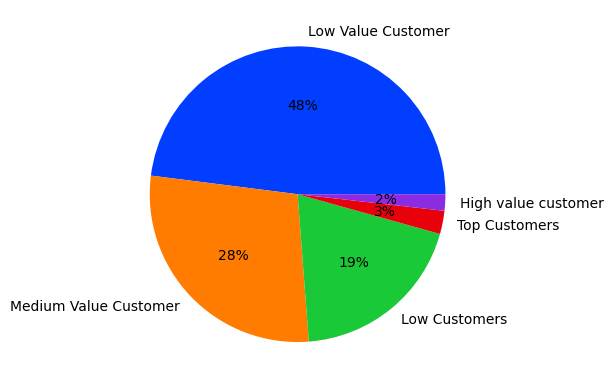

In [393]:
import matplotlib.pyplot as plt
import seaborn as sns

data =df.Customer_segment.value_counts()
labels = df.Customer_segment.value_counts().index
# define Seaborn color palette to use
colors = sns.color_palette('bright')

# plotting data on chart
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%')
plt.show()